In [110]:
import numpy as np

In [111]:
# Euler method
def euler(y0, t0, h, n, func):
    y = y0.copy()
    t = t0
    ans = [y0.copy()]

    def F(t, y):
        return np.array([f(t, y) for f in func], dtype=float)

    for _ in range(n):
        y = y + h*F(t, y)
        t += h
        ans.append(y.copy())

    return np.array(ans)



In [112]:
def heun(y0, t0, h, n, func):
    y = y0.copy()
    t = t0
    ans = [y0.copy()]

    # Vector function for system
    def F(t, y):
        return np.array([f(t, y) for f in func], dtype=float)

    for _ in range(n):
        f_eval = F(t, y)
        y_predictor = y + h*f_eval                # Euler predictor
        f_corrector = F(t+h, y_predictor)         # Slope at predicted point
        y = y + (h/2)*(f_eval + f_corrector)      # Heun corrector
        
        t += h
        ans.append(y.copy())

    return np.array(ans)



In [113]:
def runge_kutta_4(y0, t0, h, n, func):
    y = y0.copy()
    t = t0
    ans = [y0.copy()]

    # Convert list of functions into a vector function
    def F(t, y):
        return np.array([f(t, y) for f in func], dtype=float)

    for _ in range(n):
        k1 = F(t, y)
        k2 = F(t + h/2, y + h*k1/2)
        k3 = F(t + h/2, y + h*k2/2)
        k4 = F(t + h, y + h*k3)

        y = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t += h
        ans.append(y.copy())

    return np.array(ans)



In [114]:
# defining functions
def X(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 10*(1-(x/10))*(s/(10+s))*x - 0.1*x - 0.1*x

def C(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 0.1*(x-c)

def S(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 0.1*x + 0.1*c - 10*(1-(x/10))*(s/(10+s))*x

In [115]:
x0 = 1
c0 = 0
s0 = 100
np.set_printoptions(precision=2, suppress=True) # for getting only 2 decimal places


t0 = 0
h = 0.1
n = 1000 
func = [X, C, S]
y0 = np.array([x0, c0, s0])

In [116]:
print("Rnage Kutta")
print(runge_kutta_4(y0, t0, h, n, func))
print("heun")
print(heun(y0, t0, h, n, func))
print("Euler")
print(euler(y0, t0, h, n, func))


Rnage Kutta
[[  1.     0.   100.  ]
 [  2.12   0.01  98.87]
 [  3.93   0.04  97.03]
 ...
 [  9.78   9.77  81.45]
 [  9.78   9.77  81.45]
 [  9.78   9.77  81.45]]
heun
[[  1.     0.   100.  ]
 [  2.05   0.01  98.94]
 [  3.77   0.04  97.19]
 ...
 [  9.78   9.77  81.45]
 [  9.78   9.77  81.45]
 [  9.78   9.77  81.45]]
Euler
[[  1.     0.   100.  ]
 [  1.8    0.01  99.19]
 [  3.1    0.03  97.87]
 ...
 [  9.78   9.78  81.45]
 [  9.78   9.78  81.45]
 [  9.78   9.78  81.45]]


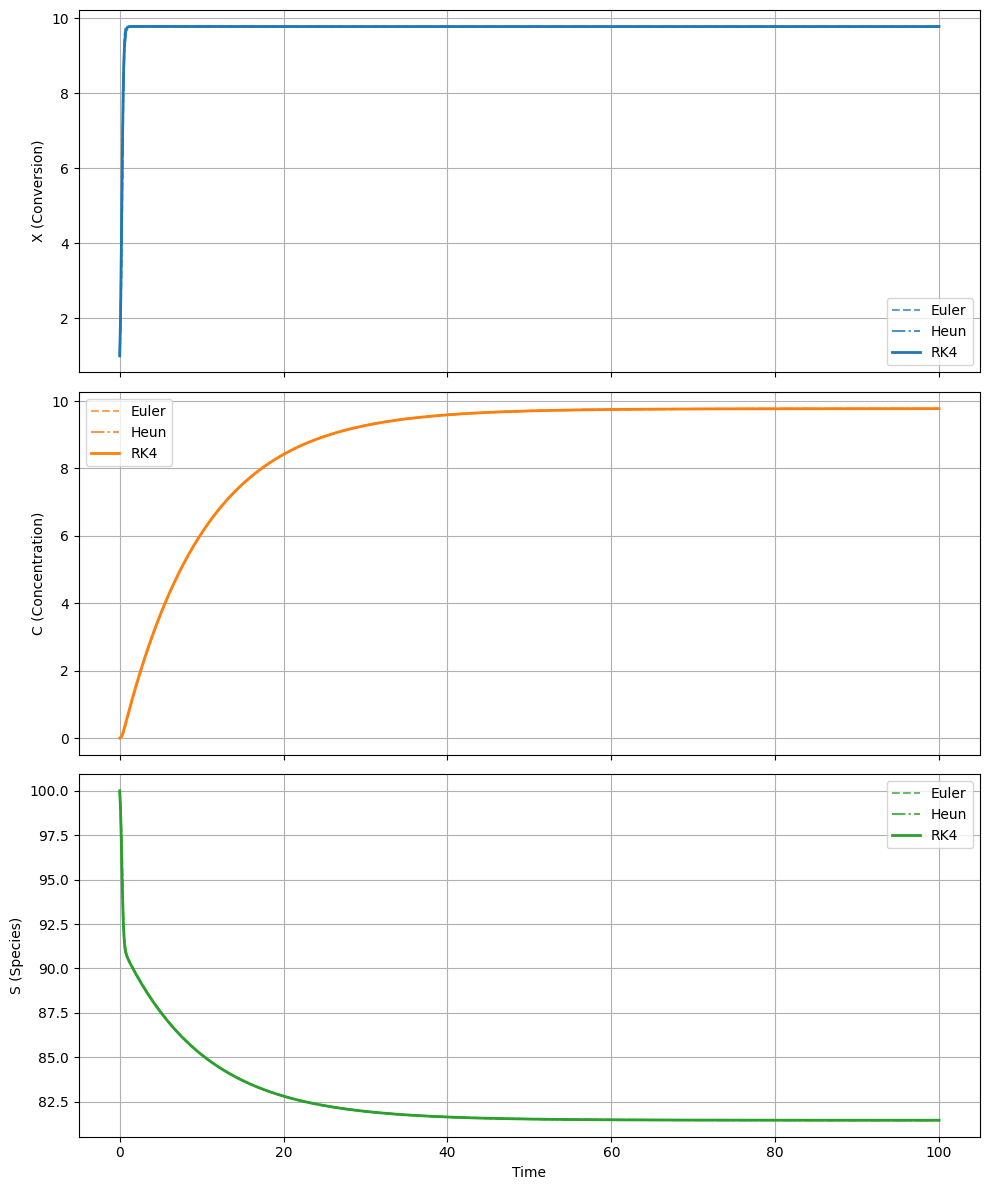

In [ ]:
import matplotlib.pyplot as plt
# part-1
y_euler = euler(y0, t0, h, n, func)
y_heun  = heun(y0, t0, h, n, func)
y_rk4   = runge_kutta_4(y0, t0, h, n, func)

species = ["X (Conversion)", "C (Concentration)", "S (Species)"]
colors  = ["tab:blue", "tab:orange", "tab:green"]
t = np.linspace(t0, t0 + n*h, n+1)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

for i in range(3):
    axes[i].plot(t, y_euler[:, i], '--', color=colors[i], alpha=0.7, label="Euler")
    axes[i].plot(t, y_heun[:, i],  '-.', color=colors[i], alpha=0.8, label="Heun")
    axes[i].plot(t, y_rk4[:, i],   '-', color=colors[i], linewidth=2, label="RK4")
    axes[i].set_ylabel(species[i])
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Time")

# plt.suptitle("Comparison of Euler, Heun, and RK4 Methods", fontsize=14)
plt.tight_layout()
plt.show()

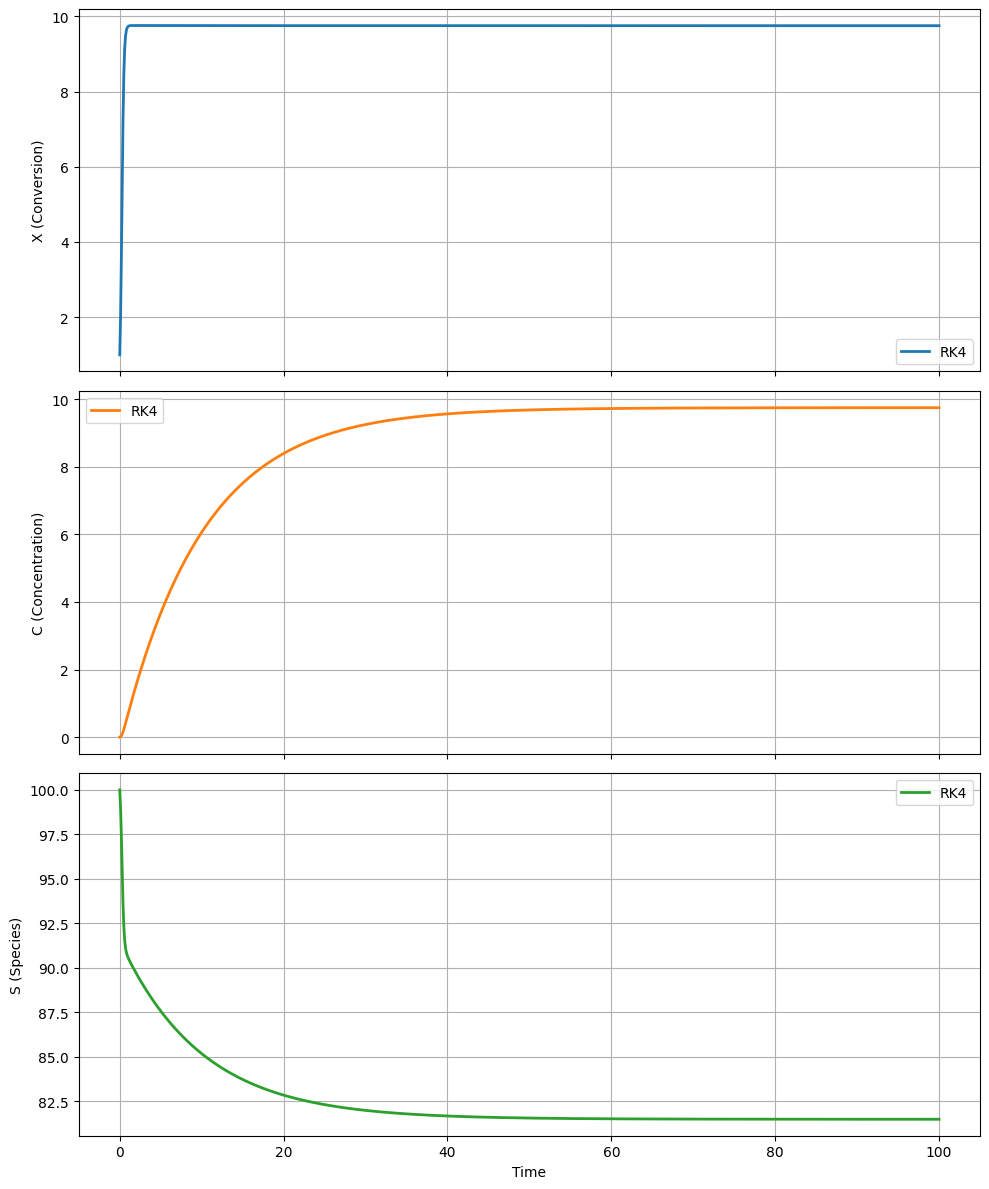

In [ ]:
import matplotlib.pyplot as plt

# part-2 a
# defining functions
def X2(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 10*(1-(x/10))*(s/(20+s))*x - 0.1*x - 0.1*x

def C2(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 0.1*(x-c)

def S2(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 0.1*x + 0.1*c - 10*(1-(x/10))*(s/(20+s))*x

func2 = [X2, C2, S2]


y_rk4   = runge_kutta_4(y0, t0, h, n, func2)


species = ["X (Conversion)", "C (Concentration)", "S (Species)"]
colors  = ["tab:blue", "tab:orange", "tab:green"]
t = np.linspace(t0, t0 + n*h, n+1)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

for i in range(3):
    axes[i].plot(t, y_rk4[:, i],   '-', color=colors[i], linewidth=2, label="RK4")
    axes[i].set_ylabel(species[i])
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Time")

# plt.suptitle("Comparison of Euler, Heun, and RK4 Methods", fontsize=14)
plt.tight_layout()
plt.show()

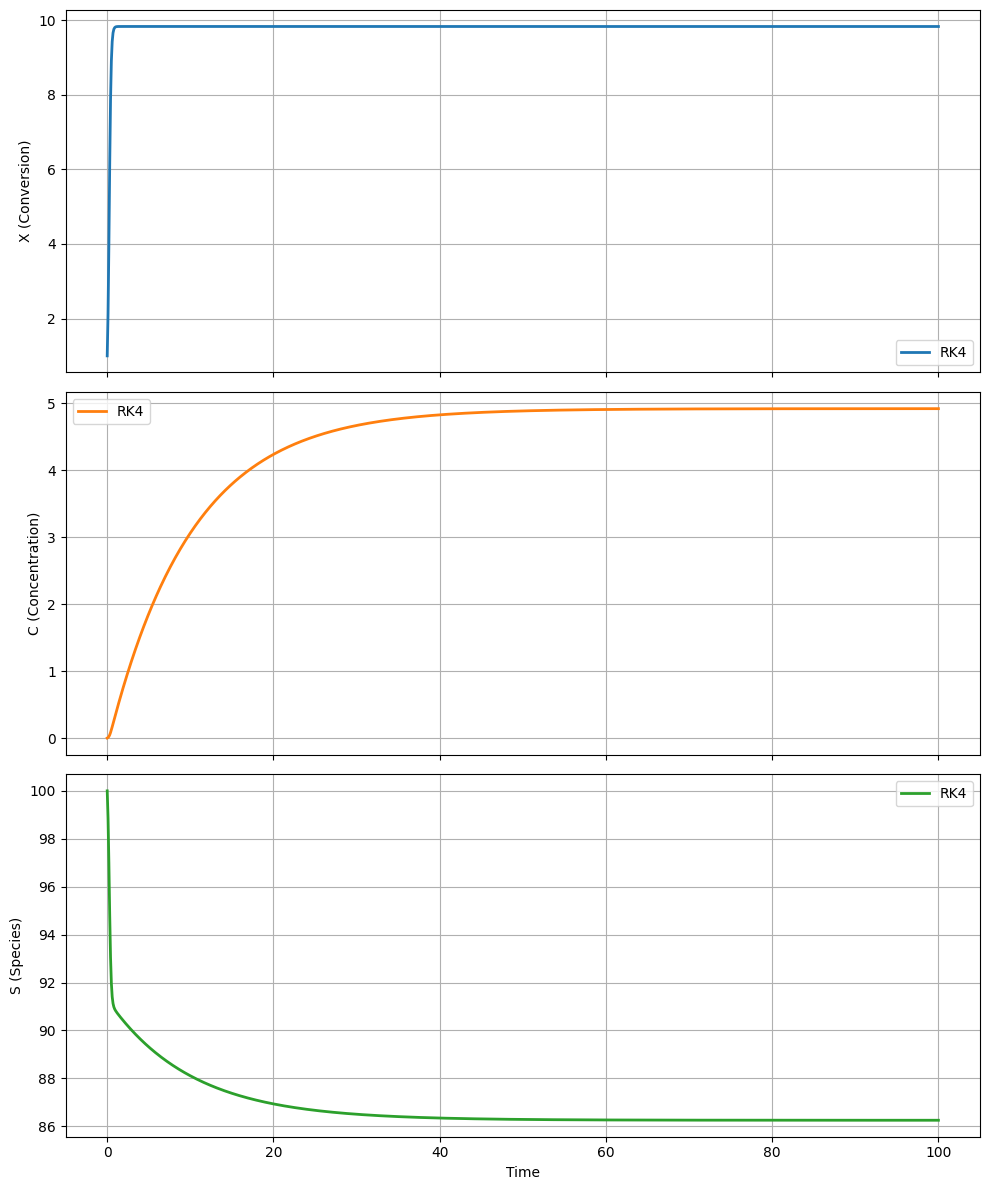

In [ ]:
import matplotlib.pyplot as plt

# part-2 b
# defining functions
def X3(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 10*(1-(x/10))*(s/(10+s))*x - 0.05*x - 0.1*x

def C3(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 0.05*(x)- 0.1*(c)

def S3(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 0.1*x + 0.1*c - 10*(1-(x/10))*(s/(10+s))*x

func3 = [X3, C3, S3]


y_rk4   = runge_kutta_4(y0, t0, h, n, func3)

species = ["X (Conversion)", "C (Concentration)", "S (Species)"]
colors  = ["tab:blue", "tab:orange", "tab:green"]
t = np.linspace(t0, t0 + n*h, n+1)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

for i in range(3):
    # axes[i].plot(t, y_euler[:, i], '--', color=colors[i], alpha=0.7, label="Euler")
    # axes[i].plot(t, y_heun[:, i],  '-.', color=colors[i], alpha=0.8, label="Heun")
    axes[i].plot(t, y_rk4[:, i],   '-', color=colors[i], linewidth=2, label="RK4")
    axes[i].set_ylabel(species[i])
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Time")

# plt.suptitle("Comparison of Euler, Heun, and RK4 Methods", fontsize=14)
plt.tight_layout()
plt.show()

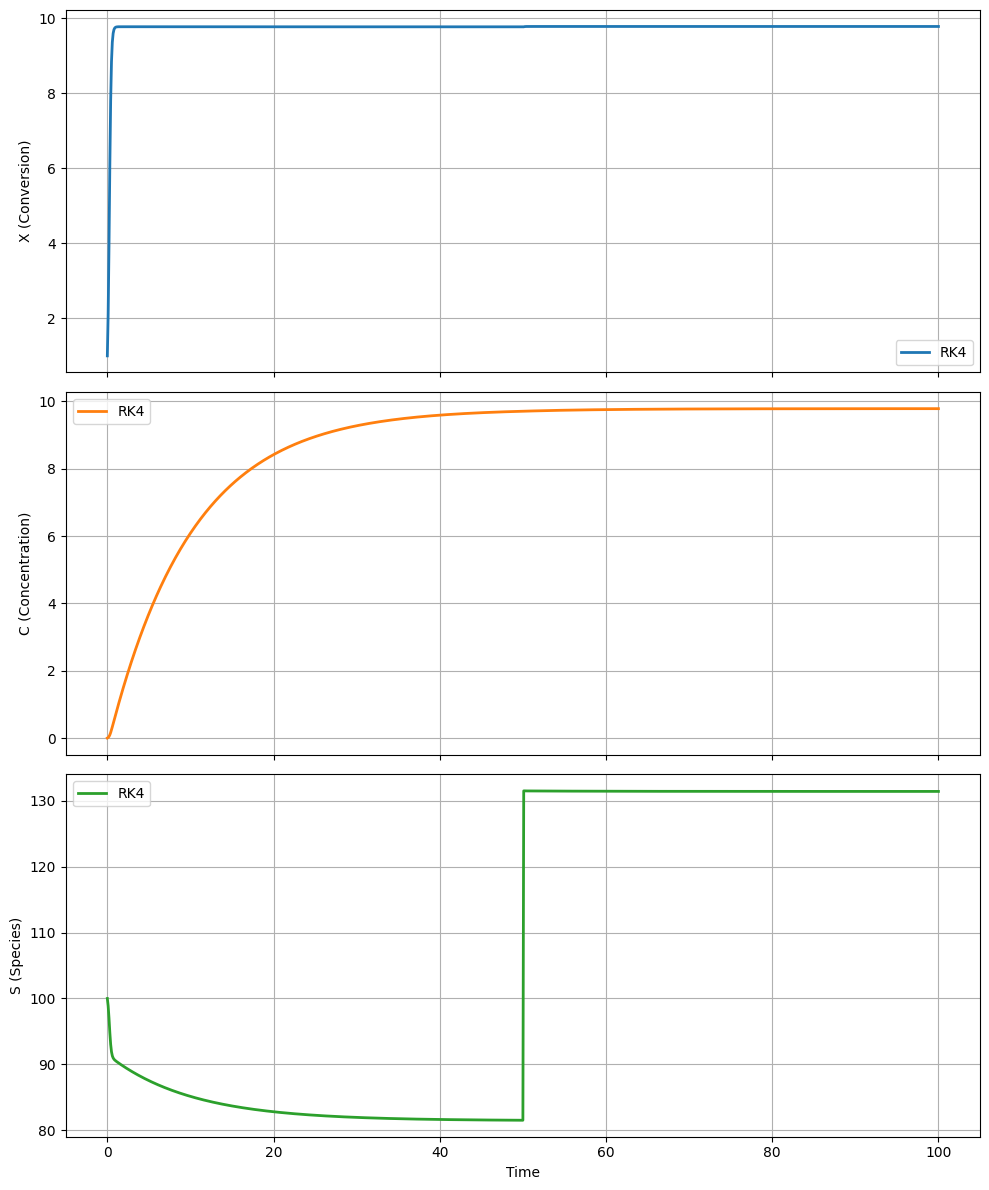

In [120]:
import matplotlib.pyplot as plt

pulse_applied = False
def runge_kutta_4_(y0, t0, h, n, func):
    global pulse_applied
    y = y0.copy()
    t = t0
    ans = [y0.copy()]

    # Convert list of functions into a vector function
    def F(t, y):
        return np.array([f(t, y) for f in func], dtype=float)

    for _ in range(n):
        k1 = F(t, y)
        k2 = F(t + h/2, y + h*k1/2)
        k3 = F(t + h/2, y + h*k2/2)
        k4 = F(t + h, y + h*k3)

        y = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

        if (t >= 50) and (not pulse_applied):
            y[2] +=50
            pulse_applied = True

        t += h
        ans.append(y.copy())

    return np.array(ans)





func3 = [X, C, S]


y_rk4   = runge_kutta_4_(y0, t0, h, n, func3)


species = ["X (Conversion)", "C (Concentration)", "S (Species)"]
colors  = ["tab:blue", "tab:orange", "tab:green"]
t = np.linspace(t0, t0 + n*h, n+1)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

for i in range(3):

    axes[i].plot(t, y_rk4[:, i],   '-', color=colors[i], linewidth=2, label="RK4")
    axes[i].set_ylabel(species[i])
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Time")

# plt.suptitle("Comparison of Euler, Heun, and RK4 Methods", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# part 4

from itertools import product
def simulate(K, Ks):
    def X(t, y):
        x = y[0]
        c = y[1]
        s = y[2]
        return 10*(1-(x/K))*(s/(Ks+s))*x - 0.1*x - 0.1*x

    def C(t, y):
        x = y[0]
        c = y[1]
        s = y[2]
        return 0.1*(x-c)

    def S(t, y):
        x = y[0]
        c = y[1]
        s = y[2]
        return 0.1*x + 0.1*c - 10*(1-(x/K))*(s/(Ks+s))*x

    y0 = np.array([1, 0, 100])
    func = [X, C, S]
    sol = runge_kutta_4(y0, t0=0, h=0.1, n=1000, func=func)
    final_s = sol[-1, 2]  # s at final time
    return final_s

# Grid search
best_s = float('inf')
best_K, best_Ks = None, None
for K, Ks in product(range(1, 51), repeat=2):
    s_final = simulate(K, Ks)
    if s_final < best_s:
        best_s = s_final
        best_K, best_Ks = K, Ks

print("Optimal K:", best_K)
print("Optimal Ks:", best_Ks)
print("Final s:", best_s)

Optimal K: 50
Optimal Ks: 1
Final s: 3.5627827712339215


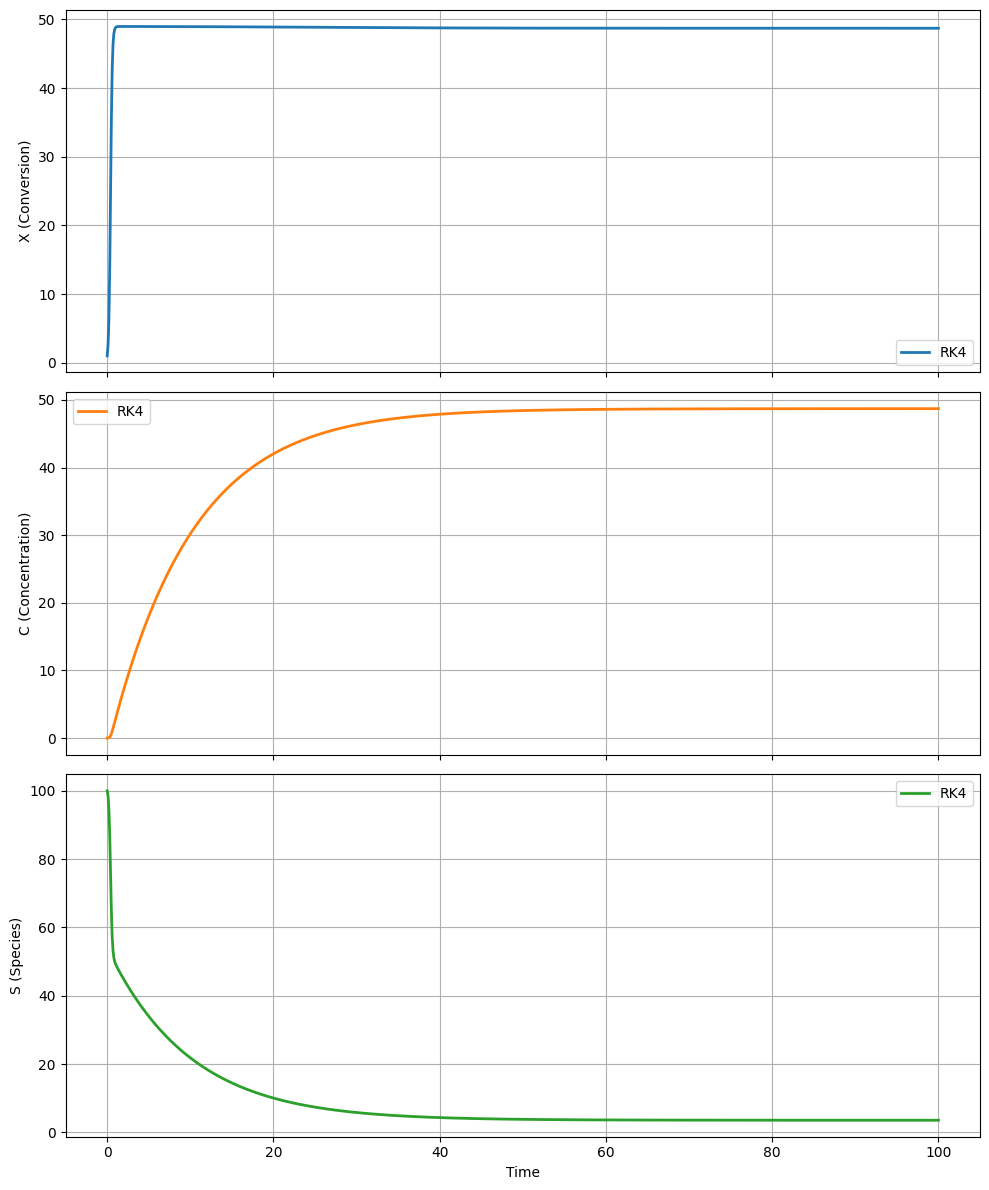

In [122]:
import matplotlib.pyplot as plt

# part 4
# defining functions
def Xlast(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 10*(1-(x/50))*(s/(1+s))*x - 0.1*x - 0.1*x

def Clast(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 0.1*(x-c)

def Slast(t, y):
    x = y[0]
    c = y[1]
    s = y[2]
    return 0.1*x + 0.1*c - 10*(1-(x/50))*(s/(1+s))*x

funclast = [Xlast, Clast, Slast]


y_rk4   = runge_kutta_4(y0, t0, h, n, funclast)


species = ["X (Conversion)", "C (Concentration)", "S (Species)"]
colors  = ["tab:blue", "tab:orange", "tab:green"]
t = np.linspace(t0, t0 + n*h, n+1)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

for i in range(3):
    axes[i].plot(t, y_rk4[:, i],   '-', color=colors[i], linewidth=2, label="RK4")
    axes[i].set_ylabel(species[i])
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Time")

# plt.suptitle("Comparison of Euler, Heun, and RK4 Methods", fontsize=14)
plt.tight_layout()
plt.show()